Fifth LangGraph which tries to guess the number given by user, using looping

In [114]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END
from random import *

In [127]:
class State(TypedDict):
    name : str
    number : int
    guess : int
    guesses_left : int
    lower_bound : int
    upper_bound : int


In [128]:
def greeting_node(state : State) -> State:
    """setup node to greet the user and initialise the context"""
    print(f"Hi {state["name"]}, let me try to guess your number")
    state["guesses_left"] = 7
    state["lower_bound"] = 1
    state["upper_bound"] = 20
    return state

def guess_node(state : State) -> State:
    """node to guess the number given by user"""

    state["guess"] = randint(state["lower_bound"], state["upper_bound"])
    print(f"my guess is {state["guess"]}")
    
    state["guesses_left"] = state["guesses_left"] - 1
    
    return state

def check_node(state : State) -> State:
    """node to check if the guess is correct and provide hint if it is incorrect"""
    
    if (state["number"] > state["guess"]):
        print("the number is higher than the guess")
        state["lower_bound"] = state["guess"] + 1

    else :
        print("the number is lower than the guess")
        state["upper_bound"] = state["guess"] - 1
  
    return state
    
def should_continue(state : State) -> str:
    "determine if to continue or end"
    if (state["number"] == state["guess"]):
        print(f"correctly guessed number {state["guess"]}")
        return "end"
    elif (state["guesses_left"] == 0):
            print("out of guess attempts")
            return "end"
    else:
         return "continue"



In [129]:
graph = StateGraph(State)
graph.add_node("greeting_node", greeting_node)
graph.add_node("guess_node", guess_node)
graph.add_node("check_node", check_node)

graph.add_edge(START, "greeting_node")
graph.add_edge("greeting_node", "guess_node")
graph.add_edge("guess_node", "check_node")

graph.add_conditional_edges(
    "check_node",
    should_continue, 
    {
        "continue" : "guess_node",
        "end" : END
    }
)

app = graph.compile()

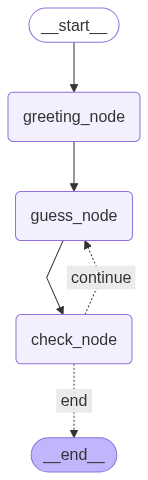

In [130]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [132]:
input = State(name = "Rammohan",  number=7)
app.invoke(input)

Hi Rammohan, let me try to guess your number
my guess is 15
the number is lower than the guess
my guess is 10
the number is lower than the guess
my guess is 5
the number is higher than the guess
my guess is 7
the number is lower than the guess
correctly guessed number 7


{'name': 'Rammohan',
 'number': 7,
 'guess': 7,
 'guesses_left': 3,
 'lower_bound': 6,
 'upper_bound': 6}